## Linear Regression Assignment

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Reading and understanding the data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Importing Car Dataset
df=pd.read_csv('...\CarPrice_Assignment.csv')

In [79]:
#Basic Data Check
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [81]:
df.shape

(205, 26)

In [82]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Visualising the data

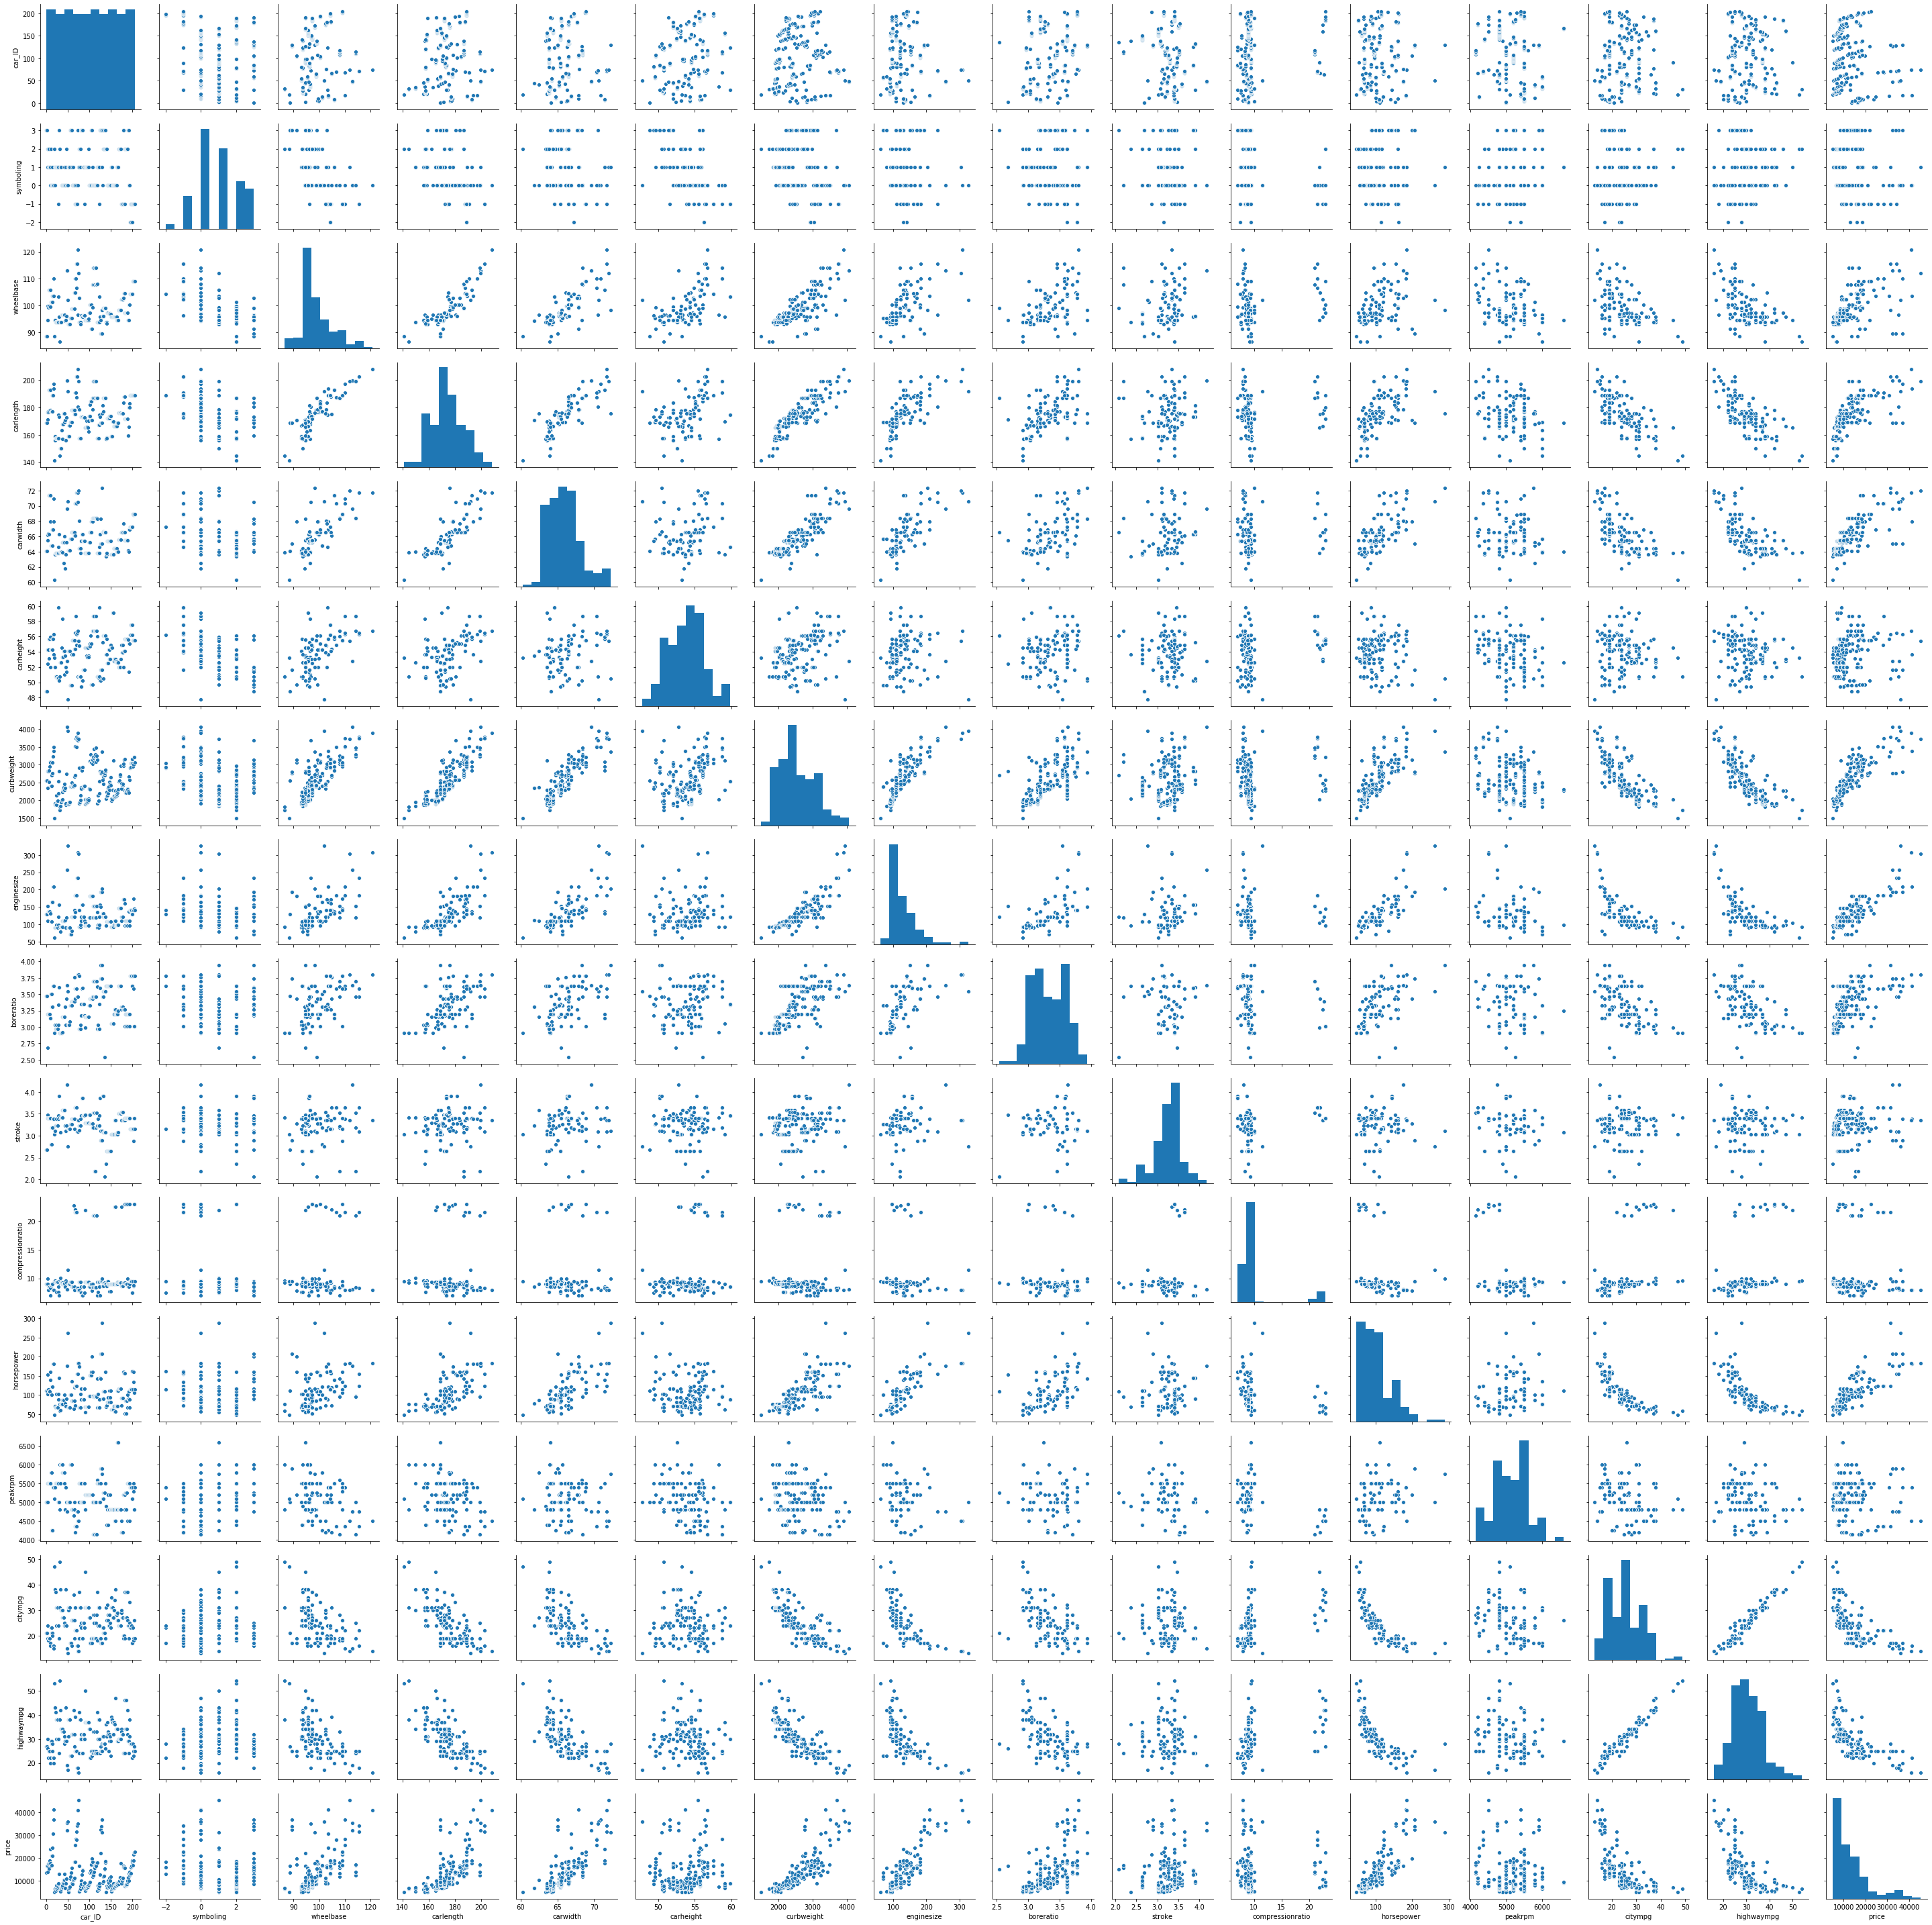

In [78]:
sns.pairplot(df)
plt.show()

Visualising Categorical Variables

There are a few categorical variables, Let's make a boxplot for some of these variables.

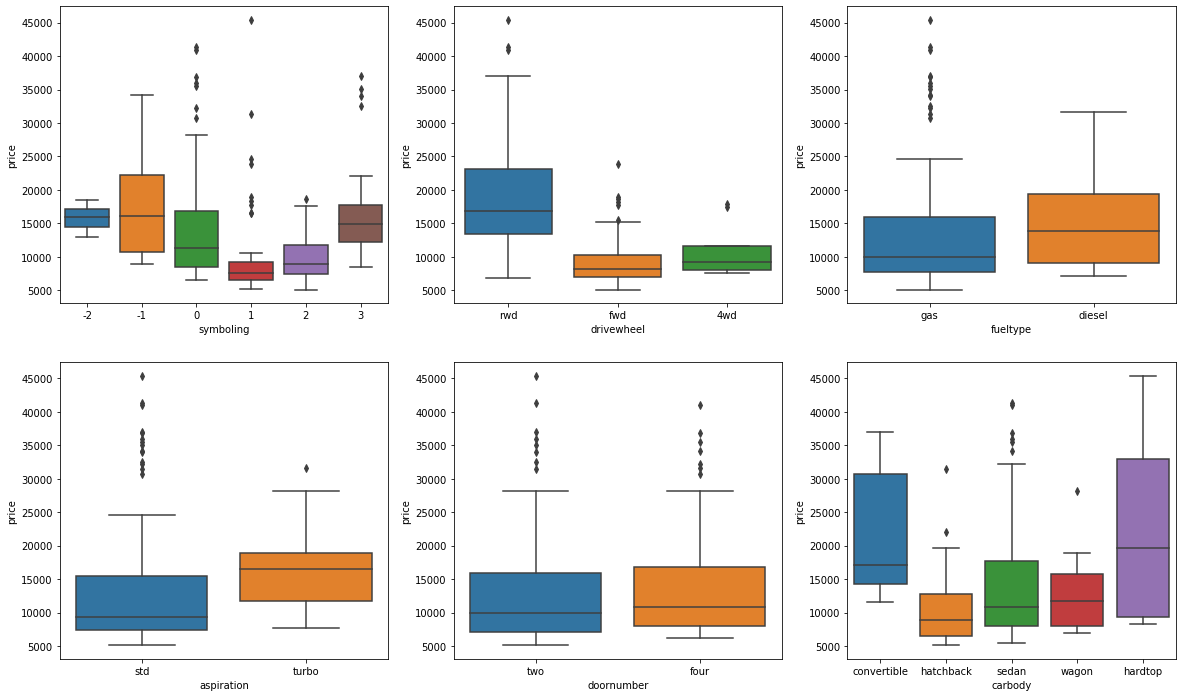

In [79]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.show()

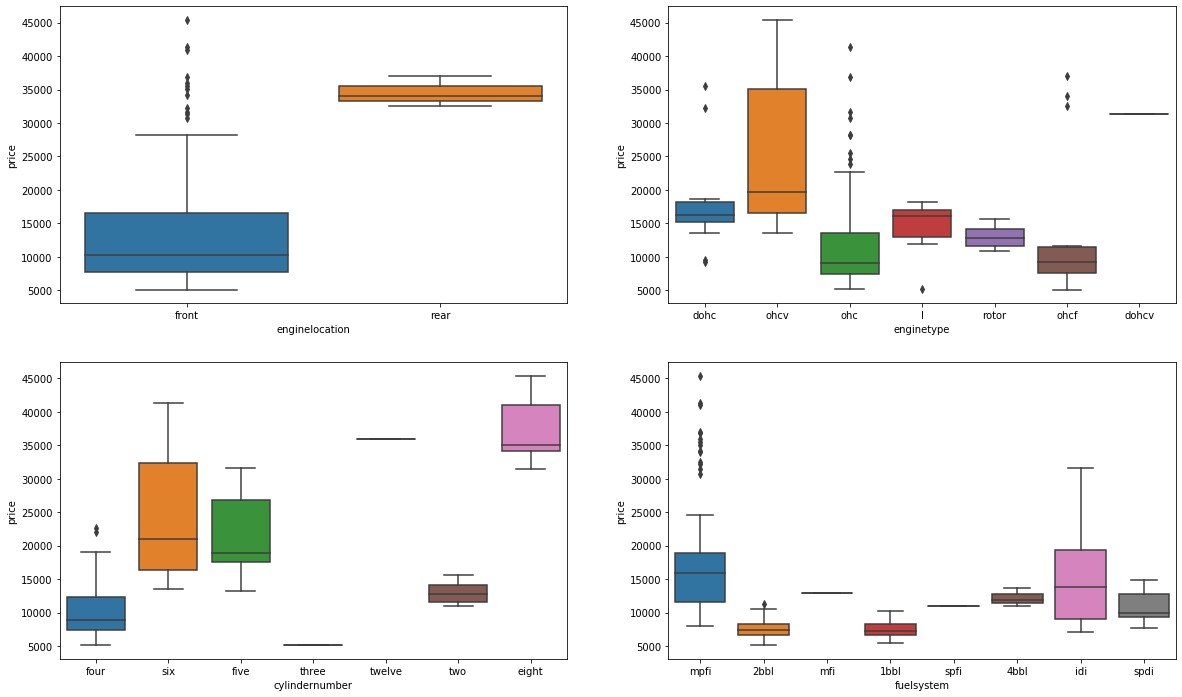

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

We can see that there are a few outliers in some categorical data such as symboling, doornumber, enginetype but since we have limited data in the dataset we are not going to treat the outliers

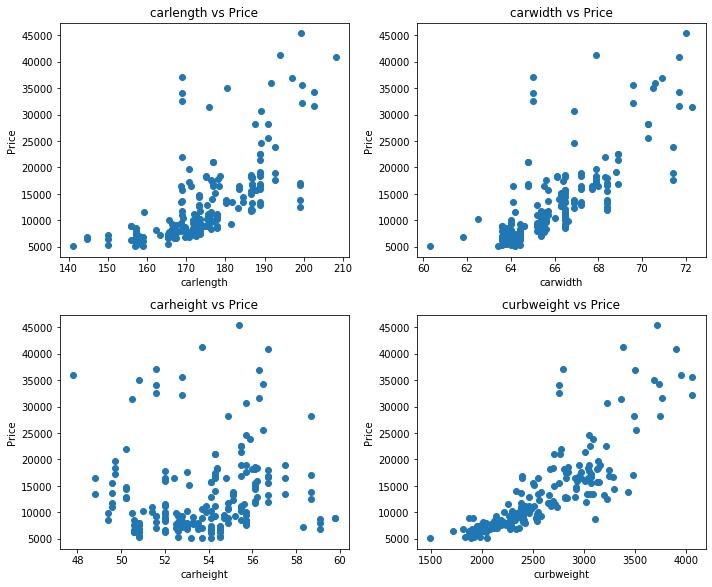

In [780]:
#Visualising numerical data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Carlength, carwidth and cuebweight have positive correlation whereas carheight doesnt

Deriving new features

In [83]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg']) #Fuel economy is derived from citympg and highwaympg

Missing Value Check

In [84]:
missing_values=df.isna().sum()
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
fueleconomy         0
dtype: int64


Since there are no missing values in the complete dataset no need of any imputation or deletion

### Data Preparation

In [85]:
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

In [86]:
df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are multiple invalid values which need to be corrected

### Fixing invalid values

In [87]:
df.CarCompany = df.CarCompany.str.lower()

def replace_name(a,b):
    df.CarCompany.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [88]:
df.CarCompany.nunique()

22

There are 22 unique car companies in the data set

In [89]:
df.loc[df.duplicated()] #Check for duplicates

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,CarCompany


In [90]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
fueleconomy         float64
CarCompany           object
dtype: object

The type for symboling is object and should not be integer

In [91]:
df = df.astype({"symboling": object})

In [92]:
df.dtypes

car_ID                int64
symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
fueleconomy         float64
CarCompany           object
dtype: object

In [93]:
df = df.drop(["car_ID", "CarName"], axis = 1) #Dropping carID and CarName fields as they are not needed

In [94]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,audi


In [95]:
df.dtypes

symboling            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
fueleconomy         float64
CarCompany           object
dtype: object

In [96]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df
df = dummies('symboling',df)
df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('doornumber',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginelocation',df)
df = dummies('enginetype',df)
df = dummies('cylindernumber',df)
df = dummies('fuelsystem',df)
df = dummies('CarCompany',df)


In [97]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


### Splitting Data into train and test data

In [98]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 100)

In [99]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
157,95.7,166.3,64.4,52.8,2109,98,3.19,3.03,9.0,70,...,0,0,0,0,0,0,0,1,0,0
81,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,88,...,0,0,0,0,0,0,0,0,0,0
32,93.7,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60,...,0,0,0,0,0,0,0,0,0,0
99,97.2,173.4,65.2,54.7,2324,120,3.33,3.47,8.5,97,...,1,0,0,0,0,0,0,0,0,0


In [100]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
160,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,...,0,0,0,0,0,0,0,1,0,0
186,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,...,0,0,0,0,0,0,0,0,1,0
59,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,...,0,0,0,0,0,0,0,0,0,0
165,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
140,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,...,0,0,0,0,0,0,1,0,0,0


### MinMax Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [102]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','carheight', 'stroke', 'compressionratio','peakrpm','citympg','highwaympg','fueleconomy']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [103]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
3,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,...,0,0,0,0,0,0,0,0,0,0
157,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,...,0,0,0,0,0,0,0,1,0,0
81,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,...,0,0,0,0,0,0,0,0,0,0
32,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,...,0,0,0,0,0,0,0,0,0,0
99,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,...,1,0,0,0,0,0,0,0,0,0


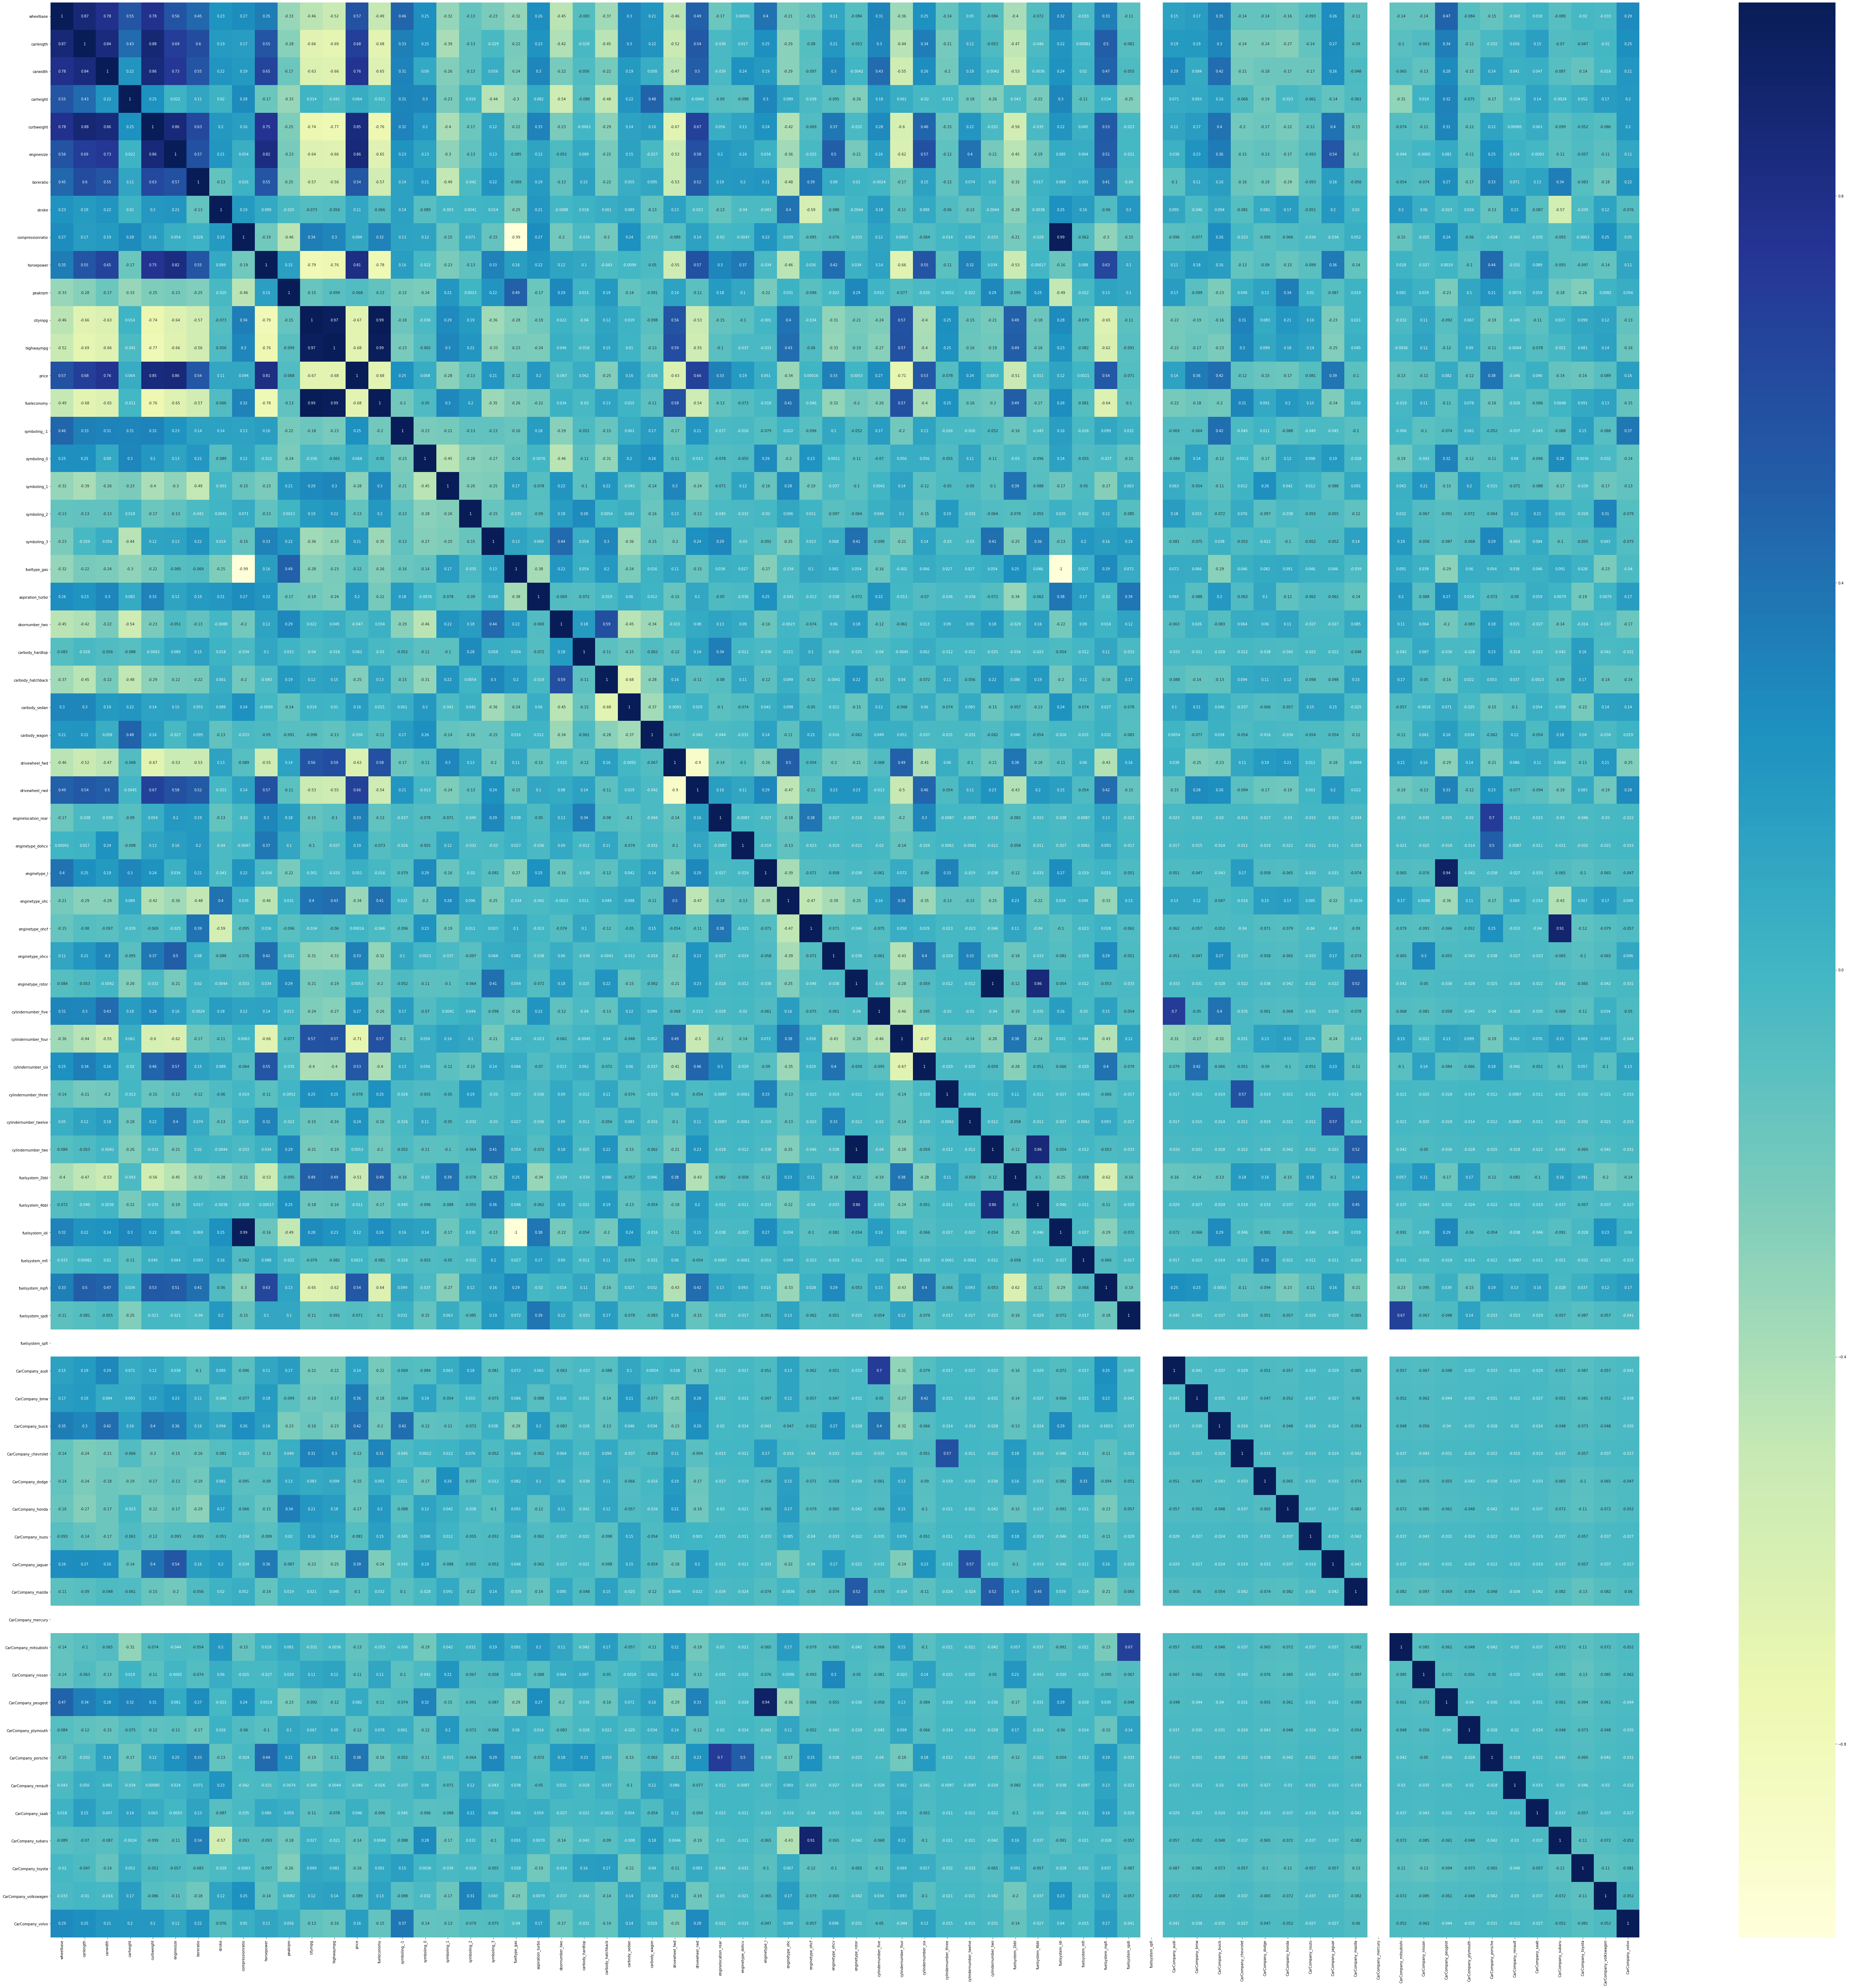

In [29]:
#Building heatmap to represent correlation between data
plt.figure(figsize = (100, 100))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing data and X and y sets

In [104]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model using RFE

In [105]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [106]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [107]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 27),
 ('carlength', False, 23),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 36),
 ('horsepower', False, 43),
 ('peakrpm', False, 20),
 ('citympg', False, 50),
 ('highwaympg', False, 25),
 ('fueleconomy', False, 48),
 ('symboling_-1', False, 9),
 ('symboling_0', False, 8),
 ('symboling_1', False, 6),
 ('symboling_2', False, 5),
 ('symboling_3', False, 7),
 ('fueltype_gas', False, 38),
 ('aspiration_turbo', False, 33),
 ('doornumber_two', False, 52),
 ('carbody_hardtop', False, 29),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 32),
 ('carbody_wagon', False, 31),
 ('drivewheel_fwd', False, 56),
 ('drivewheel_rwd', False, 51),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 12),
 ('enginetype_l', False, 11),
 ('enginetype_ohc', False, 42),
 ('enginetype_ohcf', False, 17),
 ('enginetype_ohcv', False, 45),

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'CarCompany_bmw',
       'CarCompany_porsche'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarCompany_audi', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peu

### Building model using statsmodel for detailed statistics

In [110]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [111]:
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarCompany_bmw,CarCompany_porsche
3,0.491667,0.329325,0.181132,0.404762,0.611111,0,0,0,0,0,0,0
157,0.341667,0.240884,0.139623,0.404762,0.424242,0,0,0,0,0,0,0
81,0.425000,0.325834,0.230189,0.531746,0.641414,0,0,0,0,0,0,0
32,0.308333,0.135376,0.067925,0.182540,0.444444,0,0,0,0,0,0,0
99,0.408333,0.324282,0.222642,0.515873,0.646465,0,0,0,0,0,0,0


In [112]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [113]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [114]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.16e-77
Time:                        22:25:50   Log-Likelihood:                 228.39
No. Observations:                 164   AIC:                            -432.8
Df Residuals:                     152   BIC:                            -395.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
10,cylindernumber_two,inf
0,const,29.05
2,curbweight,9.15
3,enginesize,8.45
1,carwidth,4.40
12,CarCompany_porsche,2.39
6,enginelocation_rear,2.30
4,boreratio,2.21
9,cylindernumber_twelve,1.74


The VIF for enginetype_rotor is very high so it should be eliminated

In [116]:
X_train_new = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

In [117]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [118]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [119]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.16e-77
Time:                        22:25:58   Log-Likelihood:                 228.39
No. Observations:                 164   AIC:                            -432.8
Df Residuals:                     152   BIC:                            -395.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [120]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_porsche'],
      dtype='object')

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.05
2,curbweight,9.15
3,enginesize,8.45
1,carwidth,4.40
11,CarCompany_porsche,2.39
6,enginelocation_rear,2.30
4,boreratio,2.21
8,cylindernumber_twelve,1.74
5,stroke,1.48
9,cylindernumber_two,1.27


The VIF of curbweight is very high so it should be eliminated

In [122]:
X_train_new= X_train_new.drop(['curbweight'], axis=1)

In [123]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.63e-75
Time:                        22:26:07   Log-Likelihood:                 219.54
No. Observations:                 164   AIC:                            -417.1
Df Residuals:                     153   BIC:                            -383.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [124]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.88
2,enginesize,4.89
1,carwidth,2.92
5,enginelocation_rear,2.29
10,CarCompany_porsche,2.21
3,boreratio,2.11
7,cylindernumber_twelve,1.61
4,stroke,1.47
8,cylindernumber_two,1.19
9,CarCompany_bmw,1.17


All pvalues are less than 0.05 and all VIF values are less than 5 so the model can be further analysed

### Residual Analysis of the model

In [51]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

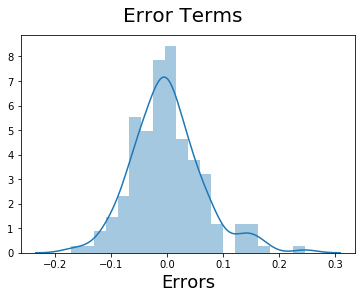

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Predition and Evaluation

In [53]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','carheight', 'stroke', 'compressionratio','peakrpm','citympg','highwaympg','fueleconomy']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [55]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

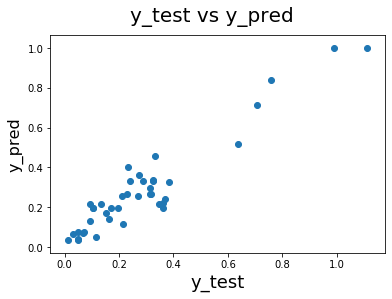

In [57]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [58]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8974086823287741

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.63e-75
Time:                        21:35:19   Log-Likelihood:                 219.54
No. Observations:                 164   AIC:                            -417.1
Df Residuals:                     153   BIC:                            -383.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

R2 and adjusted-R2 are 0.910 and 0.904 which explains approximately 90% variance is explained

All pvalues for all 10 features selected are less than 0.05 which shows that they are all significant

R2 score on the test set is 0.897

In [132]:
#Train data RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_train, y_train_price))
RMSE

0.06344518173068316

In [133]:
#Test data RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.0776671598188357

Lower values for RMSE for both train and test shows that the variance has not been explained by the model